In [26]:
def isValid(stringOfSequence):
    for i in range(len(stringOfSequence)):
        if i % 4 == 1 and stringOfSequence[i] not in ["A", "T", "G", "C", "U"]:
            return False
        if i % 4 == 2 and stringOfSequence[i] not in ["r", "d", "m"]:
            return False
        if i % 4 == 3 and stringOfSequence[i] not in ["o", "s"]:
            return False
    return True

def lengthOfSequence(stringOfSequence):
    if not isValid(stringOfSequence):
        return -1
    return len(stringOfSequence) // 4 + 1 

def getProductTypes(stringOfSequence):
    if not isValid(stringOfSequence):
        return -1
    myset = set()
    for i in range(2, len(stringOfSequence), 4):
        myset.add(stringOfSequence[i])
        if stringOfSequence[i] == 'm':
            if i + 1 < len(stringOfSequence) and stringOfSequence[i + 1] != 's':
                return -1
    if len(myset) == 1 and list(myset)[0] == 'r':
        return "vanilla RNA"
    if len(myset) == 2:
        if 'd' in myset and 'r' in myset:
            return "chimera"
        if 'm' in myset and 'r' in myset:
            return "mod RNA"
    return -1


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = pd.read_csv("synthesis_data.csv")

In [28]:
data.head()

,four_letter_sequence,synthesis_id,n-1,n+1,pure_yield,full_length_product,other_impurity,synthesis_duration,postprocessing_duration
0,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,1,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,1,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
2,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,1,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
3,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
4,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


In [29]:
print("the shape of data:{}".format(data.shape))
print("check null values")
print(data.isnull().sum())

the shape of data:(160, 9)
check null values
four_letter_sequence        0
synthesis_id                0
n-1                        34
n+1                        34
pure_yield                 16
full_length_product        32
other_impurity             32
synthesis_duration          0
postprocessing_duration     0
dtype: int64


In [33]:
#a. Use the functions from part 1 to create new columns for product type and length (if you were unable to
#complete some parts of problem 1, just do what you can.)
data["product_type"] = data["four_letter_sequence"].apply(getProductTypes)
data["length"] = data["four_letter_sequence"].apply(lengthOfSequence)

In [36]:
data.head()

,four_letter_sequence,synthesis_id,n-1,n+1,pure_yield,full_length_product,other_impurity,synthesis_duration,postprocessing_duration,product_type,length
0,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,1,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761,mod RNA,100
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,1,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761,mod RNA,100
2,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,1,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761,mod RNA,100
3,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761,mod RNA,100
4,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761,mod RNA,100


In [37]:
#b. What seems to be affecting the pure yield? What other variables seem to be related to the pure yield (e.g.,
#full length product, etc.)? Show any plots or descriptive statistics you use to explore this data and what
#strategies were needed to clean the data.

In [38]:
#synthesis_id on pure_yield
df = data.loc[:, ("synthesis_id", "pure_yield")]

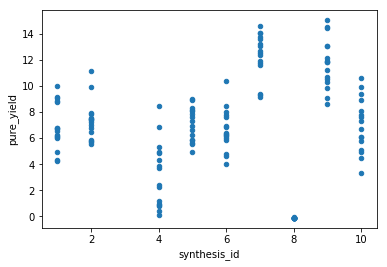

In [48]:
df.plot.scatter(x="synthesis_id", y="pure_yield")

In [49]:
df_mean = df.groupby("synthesis_id").mean()
df_std = df.groupby("synthesis_id").std()

In [63]:
#product types on purity
df = data.loc[:, ("pure_yield", "product_type")]

In [64]:
df_mean = df.groupby("product_type").mean()
df_std = df.groupby("product_type").std()

In [71]:
types= ["mod RNA", "chimera", "vanilla RNA"]
df["type_id"] = df["product_type"].apply(lambda x : types.index(x))

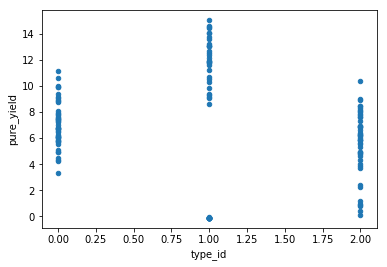

In [74]:
df.plot.scatter(x="type_id", y="pure_yield")